Loading yolo11n.onnx for ONNX Runtime inference...
Preferring ONNX Runtime TensorrtExecutionProvider
*************** EP Error ***************
EP Error D:\a\_work\1\s\onnxruntime\python\onnxruntime_pybind_state.cc:507 onnxruntime::python::RegisterTensorRTPluginsAsCustomOps Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************

image 1/1 C:\Users\m2.tb\Desktop\portfolio\license plate recognition\License-Plate-Recognition-6\1.jpg: 640x640 2 cars, 26.0ms
Speed: 3.0ms preprocess, 26.0ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)
153 190 446 377
522 175 639 263


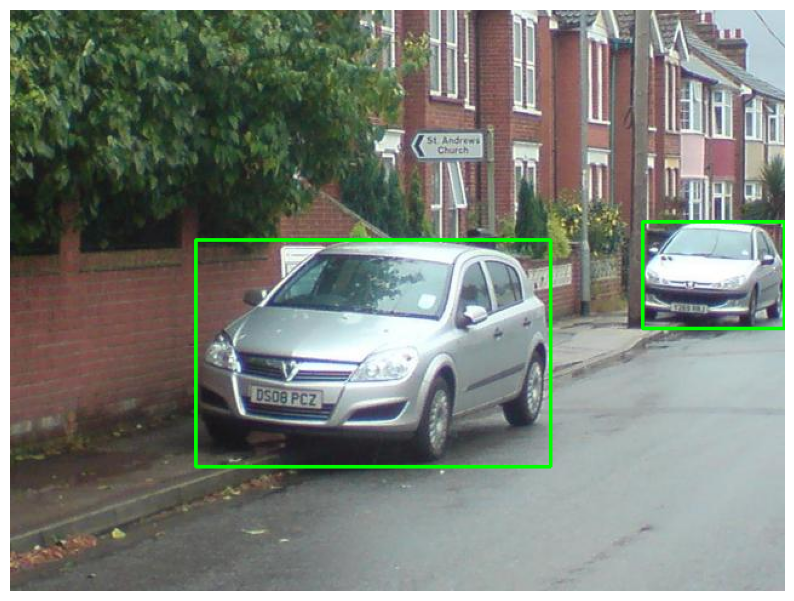

In [13]:
import torch
from ultralytics import YOLO
import cv2
import cv2
import matplotlib.pyplot as plt
import torch
from ultralytics import YOLO
import cv2
%matplotlib inline


model = YOLO('yolo11n.onnx', task="detect")
# model.export(format="onnx")
results = model('C:/Users/m2.tb/Desktop/portfolio/license plate recognition/License-Plate-Recognition-6/1.jpg')  # Replace with your test image path
# print(map[int, i.boxes.xyxy[:4]] for i in results[0])
for result in results:
    img = result.orig_img  # Get the original image with results
    for box in result.boxes.xyxy:  # Loop through detected bounding boxes
        x1, y1, x2, y2 = map(int, box[:4])
        print(x1, y1, x2, y2)
        cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Draw bounding box
    plt.figure(figsize=(10, 10))  # Adjust the size as needed
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()
# path = model.export(format="onnx")

In [2]:
import torch
print(torch.__version__)

2.5.1+cu121


In [3]:
import torch
print(torch.cuda.is_available())  # Should return True if CUDA is working


True


In [4]:
import torch
from ultralytics import YOLO
import cv2


# Load the YOLOv8 model
model = YOLO('yolo11n.pt')  # yolov8n.pt is a lightweight model; you can replace it with yolov8s.pt, yolov8m.pt, etc.

# Set device to GPU if available
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model.to(device)

# # Train the model
history1=model.train(
    data='C:/Users/m2.tb/Desktop/portfolio/license plate recognition/Vehicle Registration Plates.v1-original-images.yolov11/data.yaml', # Path to the dataset configuration file
    epochs=50,  # Number of epochs for training
    imgsz=640,  # Image size
    batch=8,  # Batch size, adjust based on GPU memory
    workers=4,  # Number of workers for data loading
    device=device,  # Device to use (GPU or CPU)
    name='car license plate',  # Name of the training run
    optimizer='Adam',  # Optimizer type, can be SGD or Adam
    lr0=0.001,  # Initial learning rate
    weight_decay=5e-4,  # Weight decay for regularization
    patience=10  # Early stopping patience
)

# Validate the model after training
# metrics = model.val()
# print(metrics)  # Outputs evaluation metrics such as mAP, precision, recall

# Save the trained model
# model.save('brain_tumor_detection_final.pt')



Ultralytics 8.3.39  Python-3.10.15 torch-2.5.1+cu121 CUDA:0 (NVIDIA TITAN Xp, 12288MiB)
engine\trainer: task=detect, mode=train, model=yolo11n.pt, data=C:/Users/m2.tb/Desktop/portfolio/license plate recognition/Vehicle Registration Plates.v1-original-images.yolov11/data.yaml, epochs=50, time=None, patience=10, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=cuda, workers=4, project=None, name=car license plate12, exist_ok=False, pretrained=True, optimizer=Adam, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False

train: Scanning C:\Users\m2.tb\Desktop\portfolio\license plate recognition\Vehicle Registration Plates.v1-original-imag
val: Scanning C:\Users\m2.tb\Desktop\portfolio\license plate recognition\Vehicle Registration Plates.v1-original-images


Plotting labels to runs\detect\car license plate12\labels.jpg... 
optimizer: Adam(lr=0.001, momentum=0.937) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs\detect\car license plate12
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      1.42G      1.269     0.9012      1.129         12        640: 100%|██████████| 772/772 [01:32<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 111/111 [00:

                   all       1765       1840      0.945      0.933      0.958      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      1.46G      1.234     0.7082      1.106         18        640: 100%|██████████| 772/772 [01:27<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 111/111 [00:

                   all       1765       1840      0.966      0.927      0.962      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      1.46G      1.219     0.6777      1.102         14        640: 100%|██████████| 772/772 [01:26<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 111/111 [00:

                   all       1765       1840       0.97      0.934      0.967      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      1.46G       1.19     0.6491      1.087         17        640: 100%|██████████| 772/772 [01:26<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 111/111 [00:

                   all       1765       1840      0.972       0.94      0.968      0.653



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      1.46G       1.18     0.6264      1.084         12        640: 100%|██████████| 772/772 [01:27<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 111/111 [00:

                   all       1765       1840      0.968      0.943      0.971      0.675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      1.46G      1.171     0.6017      1.081         20        640: 100%|██████████| 772/772 [01:29<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 111/111 [00:

                   all       1765       1840      0.977       0.94      0.972      0.672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      1.46G       1.16     0.5935      1.075         17        640: 100%|██████████| 772/772 [01:28<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 111/111 [00:

                   all       1765       1840      0.982      0.942      0.975      0.678



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      1.46G      1.153      0.581       1.07         13        640: 100%|██████████| 772/772 [01:28<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 111/111 [00:

                   all       1765       1840      0.974      0.946      0.975      0.678



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      1.46G      1.145     0.5614      1.063         20        640: 100%|██████████| 772/772 [01:29<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 111/111 [00:

                   all       1765       1840       0.98      0.951      0.975      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      1.46G      1.143     0.5632       1.06         17        640: 100%|██████████| 772/772 [01:27<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 111/111 [00:

                   all       1765       1840      0.982      0.944      0.975      0.675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      1.46G      1.135     0.5541      1.061         18        640: 100%|██████████| 772/772 [01:28<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 111/111 [00:

                   all       1765       1840      0.985      0.949      0.977      0.683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      1.46G      1.123     0.5422      1.059         14        640: 100%|██████████| 772/772 [01:29<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 111/111 [00:

                   all       1765       1840      0.974       0.95      0.977      0.687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      1.46G      1.116     0.5386      1.053         18        640: 100%|██████████| 772/772 [01:28<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 111/111 [00:

                   all       1765       1840      0.984      0.949       0.98      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      1.46G      1.121     0.5326      1.051         15        640: 100%|██████████| 772/772 [01:28<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 111/111 [00:

                   all       1765       1840      0.981      0.954      0.978      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      1.46G      1.116     0.5301      1.051         19        640: 100%|██████████| 772/772 [01:29<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 111/111 [00:

                   all       1765       1840      0.978      0.954       0.98      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      1.46G      1.121     0.5242      1.054         17        640: 100%|██████████| 772/772 [01:28<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 111/111 [00:

                   all       1765       1840      0.979      0.957      0.979        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      1.46G      1.111     0.5204      1.052         16        640: 100%|██████████| 772/772 [01:29<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 111/111 [00:

                   all       1765       1840      0.977      0.953      0.979      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      1.46G      1.106     0.5148      1.043         15        640: 100%|██████████| 772/772 [01:28<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 111/111 [00:

                   all       1765       1840      0.968       0.96      0.979      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      1.46G      1.111     0.5109      1.045         21        640: 100%|██████████| 772/772 [01:28<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 111/111 [00:

                   all       1765       1840      0.987      0.954      0.983      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      1.46G      1.094     0.5054      1.046         15        640: 100%|██████████| 772/772 [01:27<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 111/111 [00:

                   all       1765       1840      0.976      0.955       0.98      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      1.46G      1.094     0.5031      1.042         21        640: 100%|██████████| 772/772 [01:27<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 111/111 [00:

                   all       1765       1840      0.974      0.959      0.983      0.699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      1.46G      1.097     0.4982      1.038         20        640: 100%|██████████| 772/772 [01:27<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 111/111 [00:

                   all       1765       1840      0.981      0.954      0.983      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      1.46G      1.087     0.4922      1.039         15        640: 100%|██████████| 772/772 [01:27<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 111/111 [00:

                   all       1765       1840      0.969      0.966      0.981      0.699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      1.46G      1.082     0.4867      1.035         17        640: 100%|██████████| 772/772 [01:27<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 111/111 [00:

                   all       1765       1840      0.978      0.959      0.981      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      1.46G      1.087     0.4871      1.039         11        640: 100%|██████████| 772/772 [01:27<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 111/111 [00:

                   all       1765       1840      0.979      0.954      0.981      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      1.46G       1.07     0.4862      1.027         10        640: 100%|██████████| 772/772 [01:26<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 111/111 [00:

                   all       1765       1840      0.984      0.955      0.982      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      1.46G      1.077     0.4852      1.032         18        640: 100%|██████████| 772/772 [01:27<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 111/111 [00:

                   all       1765       1840      0.979      0.961      0.983      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      1.46G       1.07     0.4731      1.031         15        640: 100%|██████████| 772/772 [01:27<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 111/111 [00:

                   all       1765       1840       0.99      0.954      0.983      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      1.46G      1.068     0.4702      1.031         12        640: 100%|██████████| 772/772 [01:27<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 111/111 [00:

                   all       1765       1840      0.984      0.951      0.984      0.709



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      1.46G      1.066     0.4733      1.029         13        640: 100%|██████████| 772/772 [01:27<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 111/111 [00:

                   all       1765       1840      0.984      0.958      0.982      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      1.46G      1.069     0.4674      1.032         14        640: 100%|██████████| 772/772 [01:27<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 111/111 [00:

                   all       1765       1840      0.978      0.963      0.984      0.716



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      1.46G      1.058     0.4589      1.023         11        640: 100%|██████████| 772/772 [01:26<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 111/111 [00:

                   all       1765       1840       0.98      0.959      0.984      0.713



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      1.46G      1.053     0.4616      1.025         10        640: 100%|██████████| 772/772 [01:26<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 111/111 [00:

                   all       1765       1840      0.985      0.957      0.985      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      1.46G      1.055     0.4554      1.021         16        640: 100%|██████████| 772/772 [01:27<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 111/111 [00:

                   all       1765       1840      0.985      0.958      0.985      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      1.46G       1.04     0.4504      1.019         22        640: 100%|██████████| 772/772 [01:27<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 111/111 [00:

                   all       1765       1840       0.98      0.965      0.984      0.714



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      1.46G      1.044     0.4477       1.02         15        640: 100%|██████████| 772/772 [01:27<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 111/111 [00:

                   all       1765       1840      0.977      0.965      0.983      0.713



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      1.46G      1.025     0.4462       1.01         12        640:  17%|█▋        | 134/772 [00:15<01:13,  


RuntimeError: CUDA error: an illegal memory access was encountered
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.


In [ ]:
model.export(format='pt', path='C:/Users/m2.tb/Desktop/portfolio/license plate recognition/yolo11_1.pt')  # Save the model in PyTorch format



image 1/1 C:\Users\m2.tb\Desktop\portfolio\license plate recognition\License-Plate-Recognition-6\1.jpg: 480x640 2 License_Plates, 86.0ms
Speed: 2.0ms preprocess, 86.0ms inference, 4.0ms postprocess per image at shape (1, 3, 480, 640)


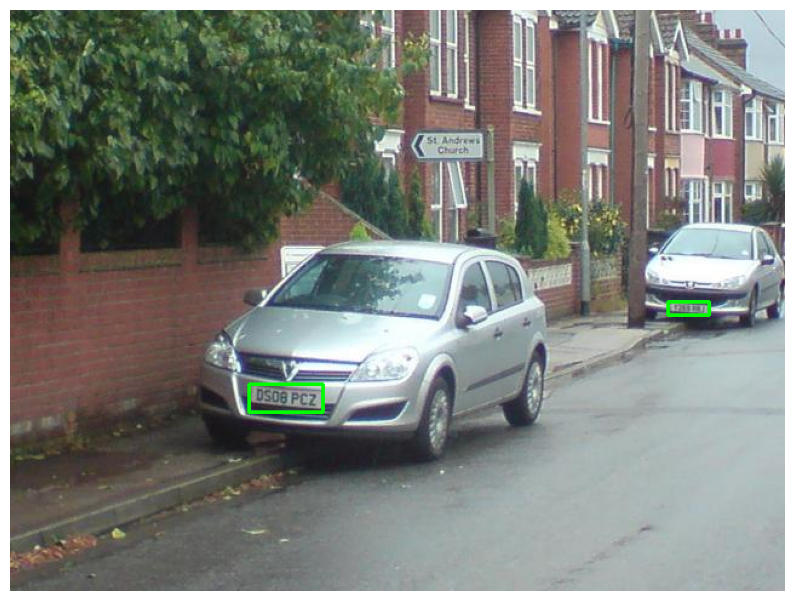

In [2]:
import cv2
import matplotlib.pyplot as plt
import torch
from ultralytics import YOLO
import cv2
%matplotlib inline

results = model('C:/Users/m2.tb/Desktop/portfolio/license plate recognition/License-Plate-Recognition-6/1.jpg')  # Replace with your test image path

for result in results:
    img = result.orig_img  # Get the original image with results
    for box in result.boxes.xyxy:  # Loop through detected bounding boxes
        x1, y1, x2, y2 = map(int, box[:4])
        cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Draw bounding box
    plt.figure(figsize=(10, 10))  # Adjust the size as needed
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()